In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Loan_Default.csv')

In [3]:
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [6]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
for col in ['rate_of_interest','Interest_rate_spread']:
       data[col]=data[col].fillna(data[col].mean())

In [8]:
for col in ['Upfront_charges','term','property_value','income','LTV','dtir1']:
       data[col]=data[col].fillna(data[col].median())

In [9]:
for col in ['loan_limit','approv_in_adv','loan_purpose','Neg_ammortization',
            'age','submission_of_application']:
  data[col]=data[col].fillna(data[col].mode()[0])

In [10]:
data.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [11]:
data=data.drop(['ID','year','Interest_rate_spread','loan_amount'],axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   rate_of_interest           148670 non-null  float64
 9   Upfront_charges            148670 non-null  float64
 10  term                       148670 non-null  float64
 11  Neg_ammortization          148670 non-null  object 
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

One Hot Encoding

In [13]:
data2=data.copy()

In [14]:
data2.nunique()

,0
loan_limit,2
Gender,4
approv_in_adv,2
loan_type,3
loan_purpose,4
Credit_Worthiness,2
open_credit,2
business_or_commercial,2
rate_of_interest,132
Upfront_charges,58272


In [15]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'loan_limit': ['cf' 'ncf']
Unique values in column 'Gender': ['Sex Not Available' 'Male' 'Joint' 'Female']
Unique values in column 'approv_in_adv': ['nopre' 'pre']
Unique values in column 'loan_type': ['type1' 'type2' 'type3']
Unique values in column 'loan_purpose': ['p1' 'p4' 'p3' 'p2']
Unique values in column 'Credit_Worthiness': ['l1' 'l2']
Unique values in column 'open_credit': ['nopc' 'opc']
Unique values in column 'business_or_commercial': ['nob/c' 'b/c']
Unique values in column 'rate_of_interest': [4.0454758 4.56      4.25      4.        3.99      4.5       4.125
 4.875     3.49      4.375     3.625     3.175     2.99      4.99
 5.25      3.75      3.375     3.25      2.75      3.875     3.5
 4.75      3.125     5.19      4.49      2.875     5.125     4.625
 3.7       5.        3.        5.375     4.18      3.69      5.5
 3.65      5.75      3.775     3.56      5.625     6.24      4.475
 3.4       2.925     3.925     5.74      5.875     3.45      4.275
 2

In [16]:
data2.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,rate_of_interest,Upfront_charges,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,4.045476,2596.45,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,4.045476,2596.45,...,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,1,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,4.560000,595.00,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,4.250000,2596.45,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,4.000000,0.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [17]:
data2=pd.get_dummies(data2)
data2.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,4.045476,2596.45,360.0,118000.0,1740.0,758,98.728814,1,45.0,True,...,False,False,False,True,False,False,False,True,False,True
1,4.045476,2596.45,360.0,418000.0,4980.0,552,75.135870,1,39.0,True,...,False,False,False,True,True,False,False,False,False,True
2,4.560000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0,True,...,False,False,False,True,False,False,False,True,False,True
3,4.250000,2596.45,360.0,658000.0,11880.0,587,69.376900,0,42.0,True,...,False,False,True,False,True,False,False,False,False,True
4,4.000000,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0,True,...,False,False,True,False,True,False,False,False,False,True


In [18]:
data

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,rate_of_interest,Upfront_charges,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,4.045476,2596.45,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,4.045476,2596.45,...,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,1,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,4.560000,595.00,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,4.250000,2596.45,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,4.000000,0.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,3.125000,9960.00,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,5.190000,0.00,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,3.125000,1226.64,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,3.500000,4323.33,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [19]:
data2.columns

Index(['rate_of_interest', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'Status', 'dtir1', 'loan_limit_cf',
       'loan_limit_ncf', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'total_units_1U', 'total_unit

In [20]:
object_columns = data.select_dtypes(include=['object'])
print(object_columns)


       loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0              cf  Sex Not Available         nopre     type1           p1   
1              cf               Male         nopre     type2           p1   
2              cf               Male           pre     type1           p1   
3              cf               Male         nopre     type1           p4   
4              cf              Joint           pre     type1           p1   
...           ...                ...           ...       ...          ...   
148665         cf  Sex Not Available         nopre     type1           p3   
148666         cf               Male         nopre     type1           p1   
148667         cf               Male         nopre     type1           p4   
148668         cf             Female         nopre     type1           p4   
148669         cf             Female         nopre     type1           p3   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortizati

In [21]:
for i in [ 'loan_limit_cf',
       'loan_limit_ncf', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'total_units_1U', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_type_EXP', 'co-applicant_credit_type_CIB',
       'co-applicant_credit_type_EXP', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55-64', 'age_65-74', 'age_<25', 'age_>74',
       'submission_of_application_not_inst',
       'submission_of_application_to_inst', 'Region_North',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_Indriect', 'Security_Type_direct']:
       data2[i]=data2[i].astype('int64')

In [22]:
data2.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,4.045476,2596.45,360.0,118000.0,1740.0,758,98.728814,1,45.0,1,...,0,0,0,1,0,0,0,1,0,1
1,4.045476,2596.45,360.0,418000.0,4980.0,552,75.135870,1,39.0,1,...,0,0,0,1,1,0,0,0,0,1
2,4.560000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0,1,...,0,0,0,1,0,0,0,1,0,1
3,4.250000,2596.45,360.0,658000.0,11880.0,587,69.376900,0,42.0,1,...,0,0,1,0,1,0,0,0,0,1
4,4.000000,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0,1,...,0,0,1,0,1,0,0,0,0,1


Min Max Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
x=data2.drop('Status',axis=1)
y=data2['Status']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4119003822992021

In [28]:
x1=x.copy()
x1.columns

Index(['rate_of_interest', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'dtir1', 'loan_limit_cf',
       'loan_limit_ncf', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'total_units_1U', 'total_units_2U', 'to

In [29]:
x1.drop(['loan_limit_cf',
       'loan_limit_ncf', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_home', 'Secured_by_land',
       'total_units_1U', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CIB', 'credit_type_CRIF', 'credit_type_EQUI',
       'credit_type_EXP', 'co-applicant_credit_type_CIB',
       'co-applicant_credit_type_EXP', 'age_25-34', 'age_35-44', 'age_45-54',
       'age_55-64', 'age_65-74', 'age_<25', 'age_>74',
       'submission_of_application_not_inst',
       'submission_of_application_to_inst', 'Region_North',
       'Region_North-East', 'Region_central', 'Region_south',
       'Security_Type_Indriect', 'Security_Type_direct'],axis=1,inplace=True)

In [30]:
x1.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,4.045476,2596.45,360.0,118000.0,1740.0,758,98.728814,45.0
1,4.045476,2596.45,360.0,418000.0,4980.0,552,75.135870,39.0
2,4.560000,595.00,360.0,508000.0,9480.0,834,80.019685,46.0
3,4.250000,2596.45,360.0,658000.0,11880.0,587,69.376900,42.0
4,4.000000,0.00,360.0,758000.0,10440.0,602,91.886544,39.0


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=scaler.fit_transform(x1)

In [32]:
type(x1)

numpy.ndarray

In [33]:
x1= pd.DataFrame(x1,columns=['rate_of_interest','Upfront_charges', 'term','property_value','income','Credit_Score','LTV','dtir1'])

In [34]:
x1.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1
0,0.505684,0.043274,1.0,0.006667,0.003007,0.6450,0.012485,0.714286
1,0.505684,0.043274,1.0,0.024848,0.008607,0.1300,0.009472,0.607143
2,0.570000,0.009917,1.0,0.030303,0.016385,0.8350,0.010096,0.732143
3,0.531250,0.043274,1.0,0.039394,0.020533,0.2175,0.008737,0.660714
4,0.500000,0.000000,1.0,0.045455,0.018044,0.2550,0.011611,0.607143


In [35]:
x2=x.drop(['rate_of_interest','Upfront_charges', 'term','property_value','income','Credit_Score','LTV','dtir1'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

,rate_of_interest,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit_cf,loan_limit_ncf,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,0.505684,0.043274,1.0,0.006667,0.003007,0.6450,0.012485,0.714286,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0.505684,0.043274,1.0,0.024848,0.008607,0.1300,0.009472,0.607143,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0.570000,0.009917,1.0,0.030303,0.016385,0.8350,0.010096,0.732143,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0.531250,0.043274,1.0,0.039394,0.020533,0.2175,0.008737,0.660714,1,0,...,0,0,1,0,1,0,0,0,0,1
4,0.500000,0.000000,1.0,0.045455,0.018044,0.2550,0.011611,0.607143,1,0,...,0,0,1,0,1,0,0,0,0,1


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3360262874867104

In [39]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
model1=lg.fit(x_train,y_train)

In [42]:
y_pred_lg=lg.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [44]:
confusion_matrix(y_test,y_pred_lg)

array([[22271,   223],
       [ 3719,  3521]])

In [45]:
y_pred_lg

array([0, 0, 0, ..., 1, 0, 1])

In [46]:
print("Accuracy = ",accuracy_score(y_test,y_pred_lg))
print("Precision = ",precision_score(y_test,y_pred_lg))
print("Recall = ",recall_score(y_test,y_pred_lg))
print("F1 score = ",f1_score(y_test,y_pred_lg))

Accuracy =  0.8674244972085827
Precision =  0.9404380341880342
Recall =  0.48632596685082874
F1 score =  0.6411143481427531


In [47]:
#Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [49]:
print("Accuraccy = ",accuracy_score(y_test,y_pred))

Accuraccy =  1.0


In [50]:
# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred=rf_clf.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.9999663684670748


In [68]:
#KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
metric_k=[]
n=np.arange(3,15)
for k in n:
  clf=KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [55]:
metric_k

[0.8358444877917536,
 0.8552498822896347,
 0.8496334162911146,
 0.8584448779175354,
 0.8562924598103182,
 0.860126454563799,
 0.8586130355821618,
 0.8604291383601265,
 0.8595210869711442,
 0.8615726104795857,
 0.8607318221564539,
 0.8609672428869308]

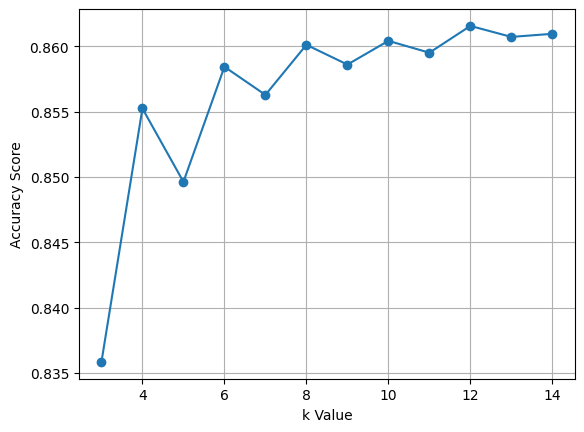

In [56]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('Accuracy Score')
plt.grid()

In [57]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[21612,   882],
       [ 3589,  3651]])

In [59]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [60]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print("Precision = ",precision_score(y_test,y_pred))
print("Recall = ",recall_score(y_test,y_pred))
print("F1 score = ",f1_score(y_test,y_pred))

Accuracy =  0.8496334162911146
Precision =  0.8054268696227663
Recall =  0.5042817679558012
F1 score =  0.6202327359211757


In [61]:
#NAIVE BAYES CLASSIFIER

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [63]:
gnb.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred_gnb=gnb.predict(x_test)

In [65]:
confusion_matrix(y_test,y_pred_gnb)

array([[22444,    50],
       [ 3911,  3329]])

In [66]:
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
print("Accuracy = ",accuracy_score(y_test,y_pred_gnb))
print("Precision = ",precision_score(y_test,y_pred_gnb))
print("Recall = ",recall_score(y_test,y_pred_gnb))
print("F1 score = ",f1_score(y_test,y_pred_gnb))


Accuracy =  0.8667854980830026
Precision =  0.9852027226990234
Recall =  0.45980662983425413
F1 score =  0.6269893586966758
